In [ ]:
from infra.repo import sync_latest_etf_data
from datetime import datetime

for code in ["513100", "510300", "518880", "159915"]:
    sync_latest_etf_data(
                        codes=[code],  
                        include_tick=False,
                        beg_date=datetime.strptime("2013-01-01", "%Y-%m-%d"),
                        end_date=datetime.strptime("2025-12-31", "%Y-%m-%d")
                    )

In [13]:
import config
from core.data import DataLoader

loader = DataLoader("2013-08-01", "2025-12-31", auto_sync=False)
data_dict = loader.load(config.ETF_SYMBOLS)
df = data_dict['close']
print( "closes:", "\n", closes)
    

2026-01-04 16:52:57 [INFO] [Data] Loading local parquet files...
2026-01-04 16:52:58 [INFO] [Data] Processed field: open (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: high (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: low (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: close (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: volume (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: amount (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: turn (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: price_chg (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: pe_ttm (Shape: (3020, 4))
2026-01-04 16:52:58 [INFO] [Data] Processed field: pb_ttm (Shape: (3020, 4))
closes: 
 code        159915  510300  513100  518880
datetime                                  
2013-08-02   1.169   2.294   1.023   2.578
2013-08-05   1.193   2.327   1.03

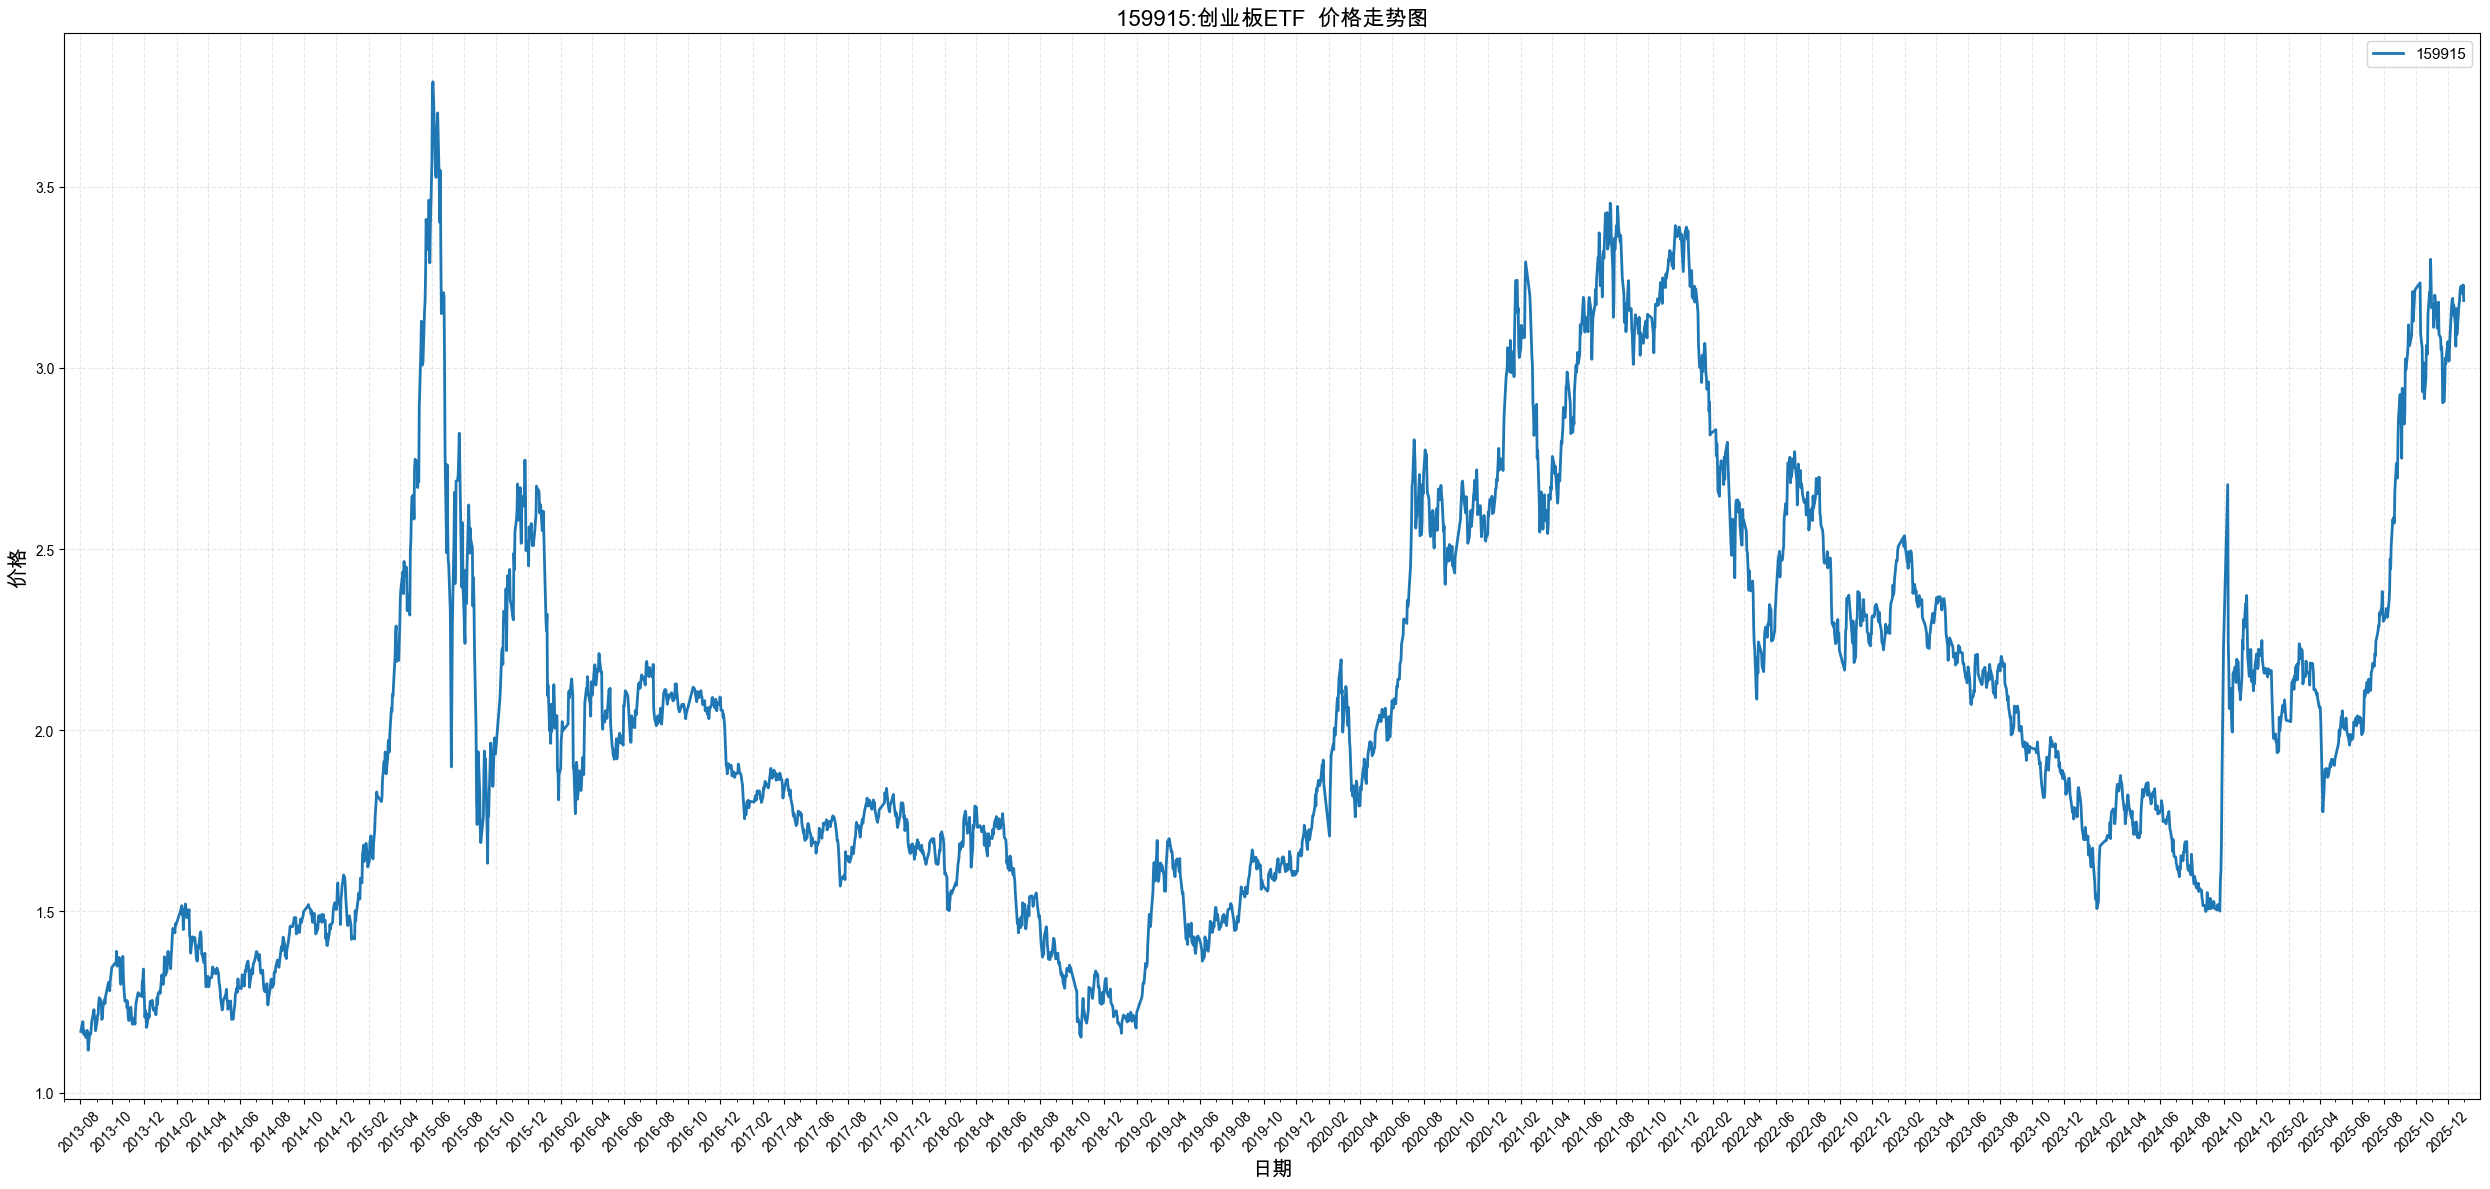

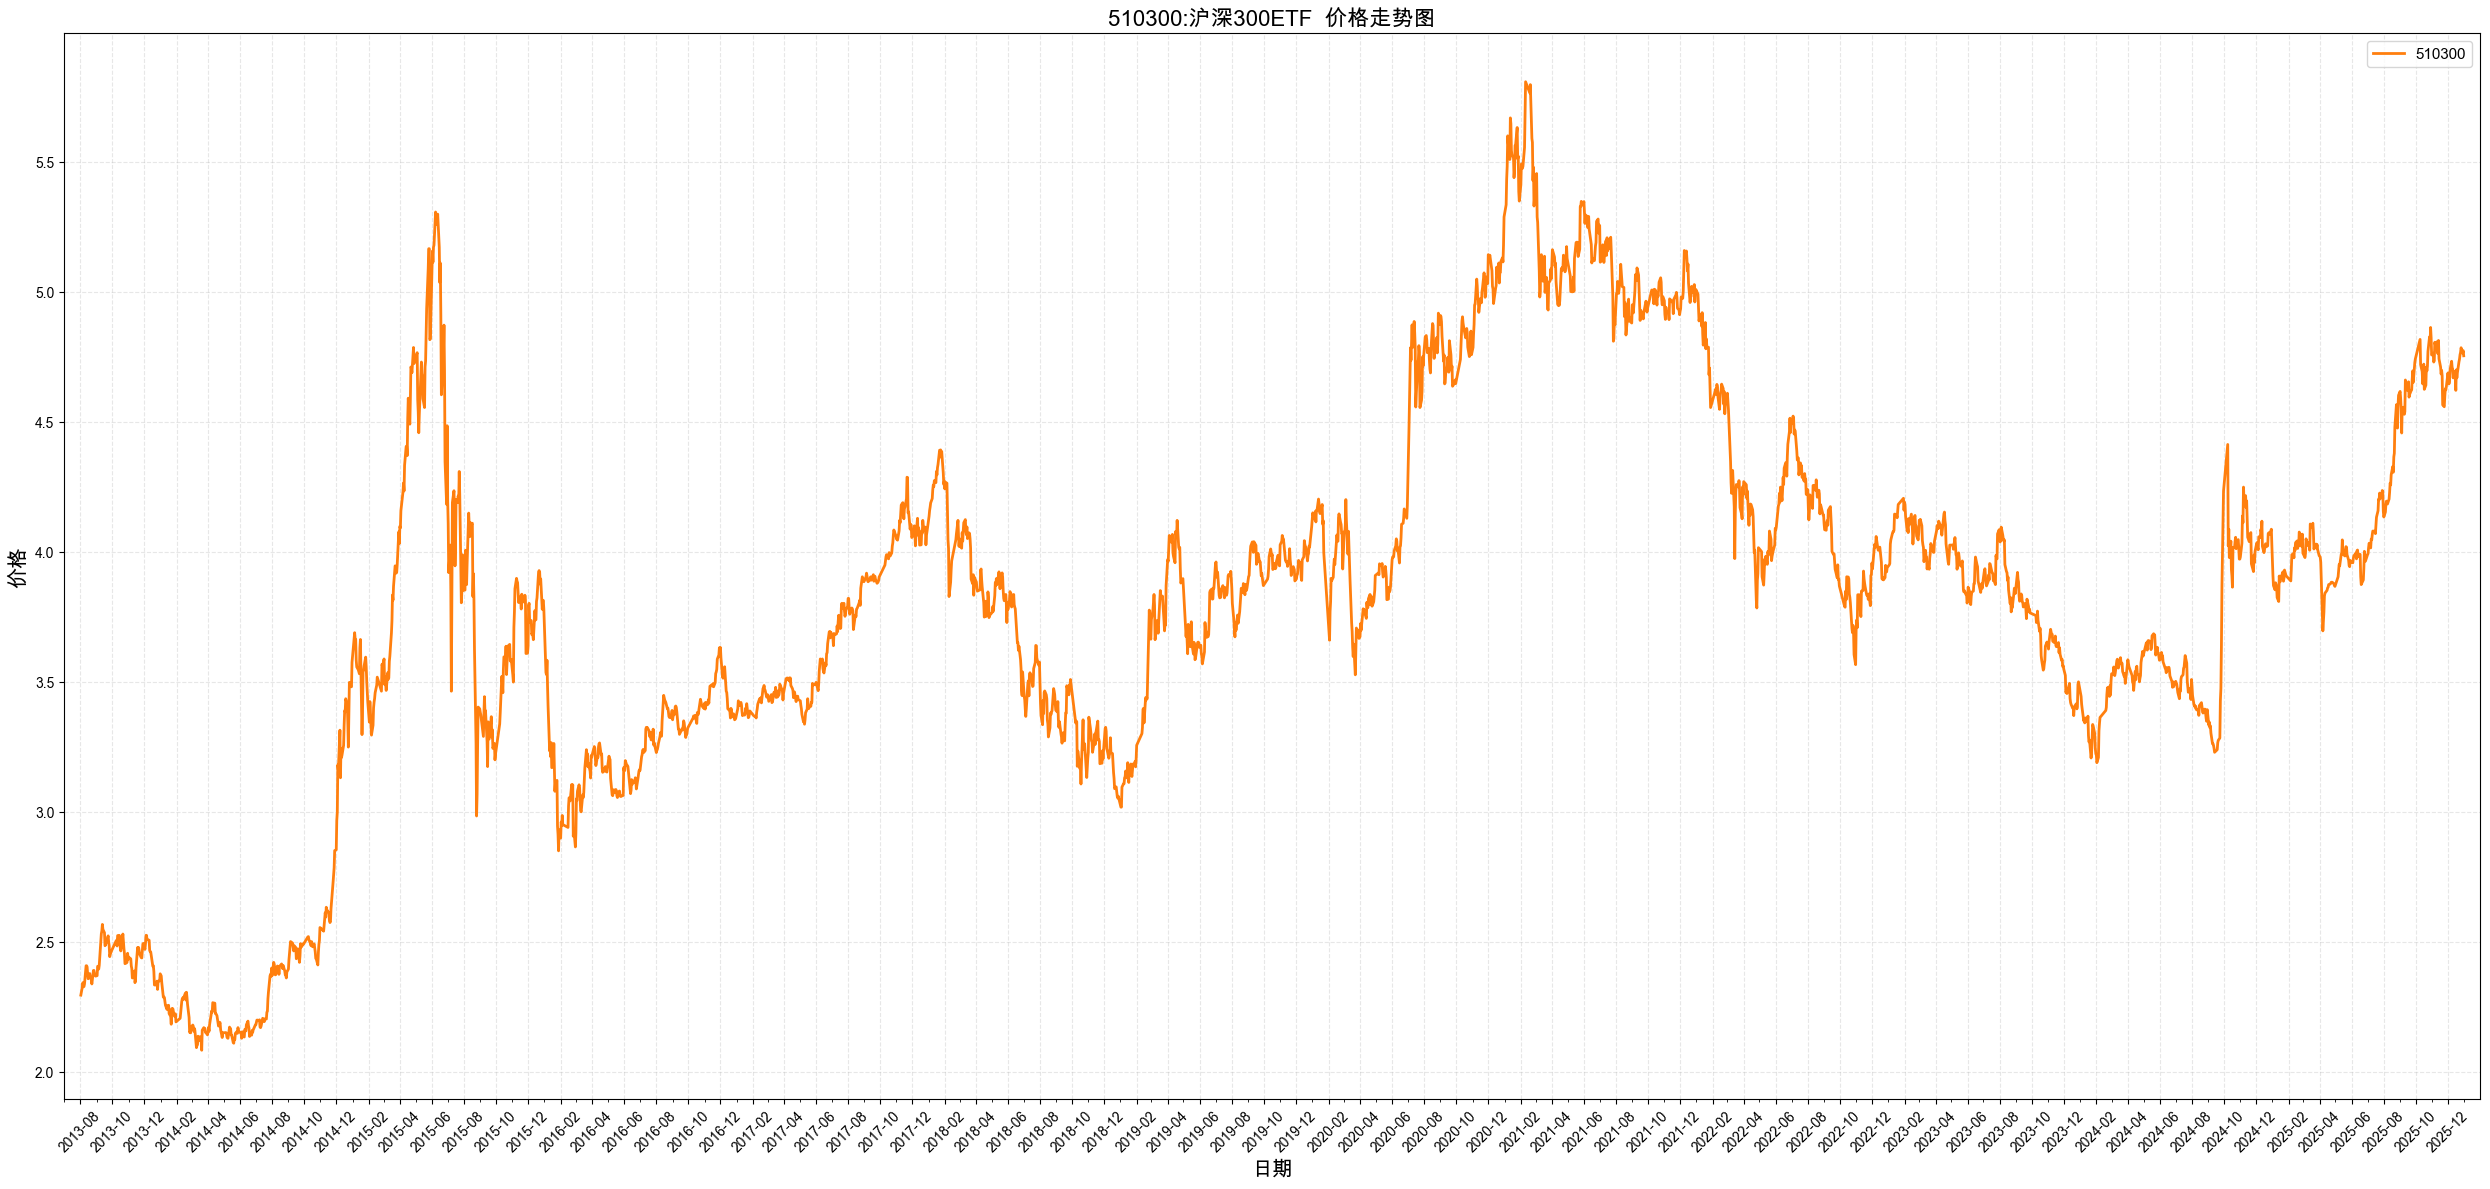

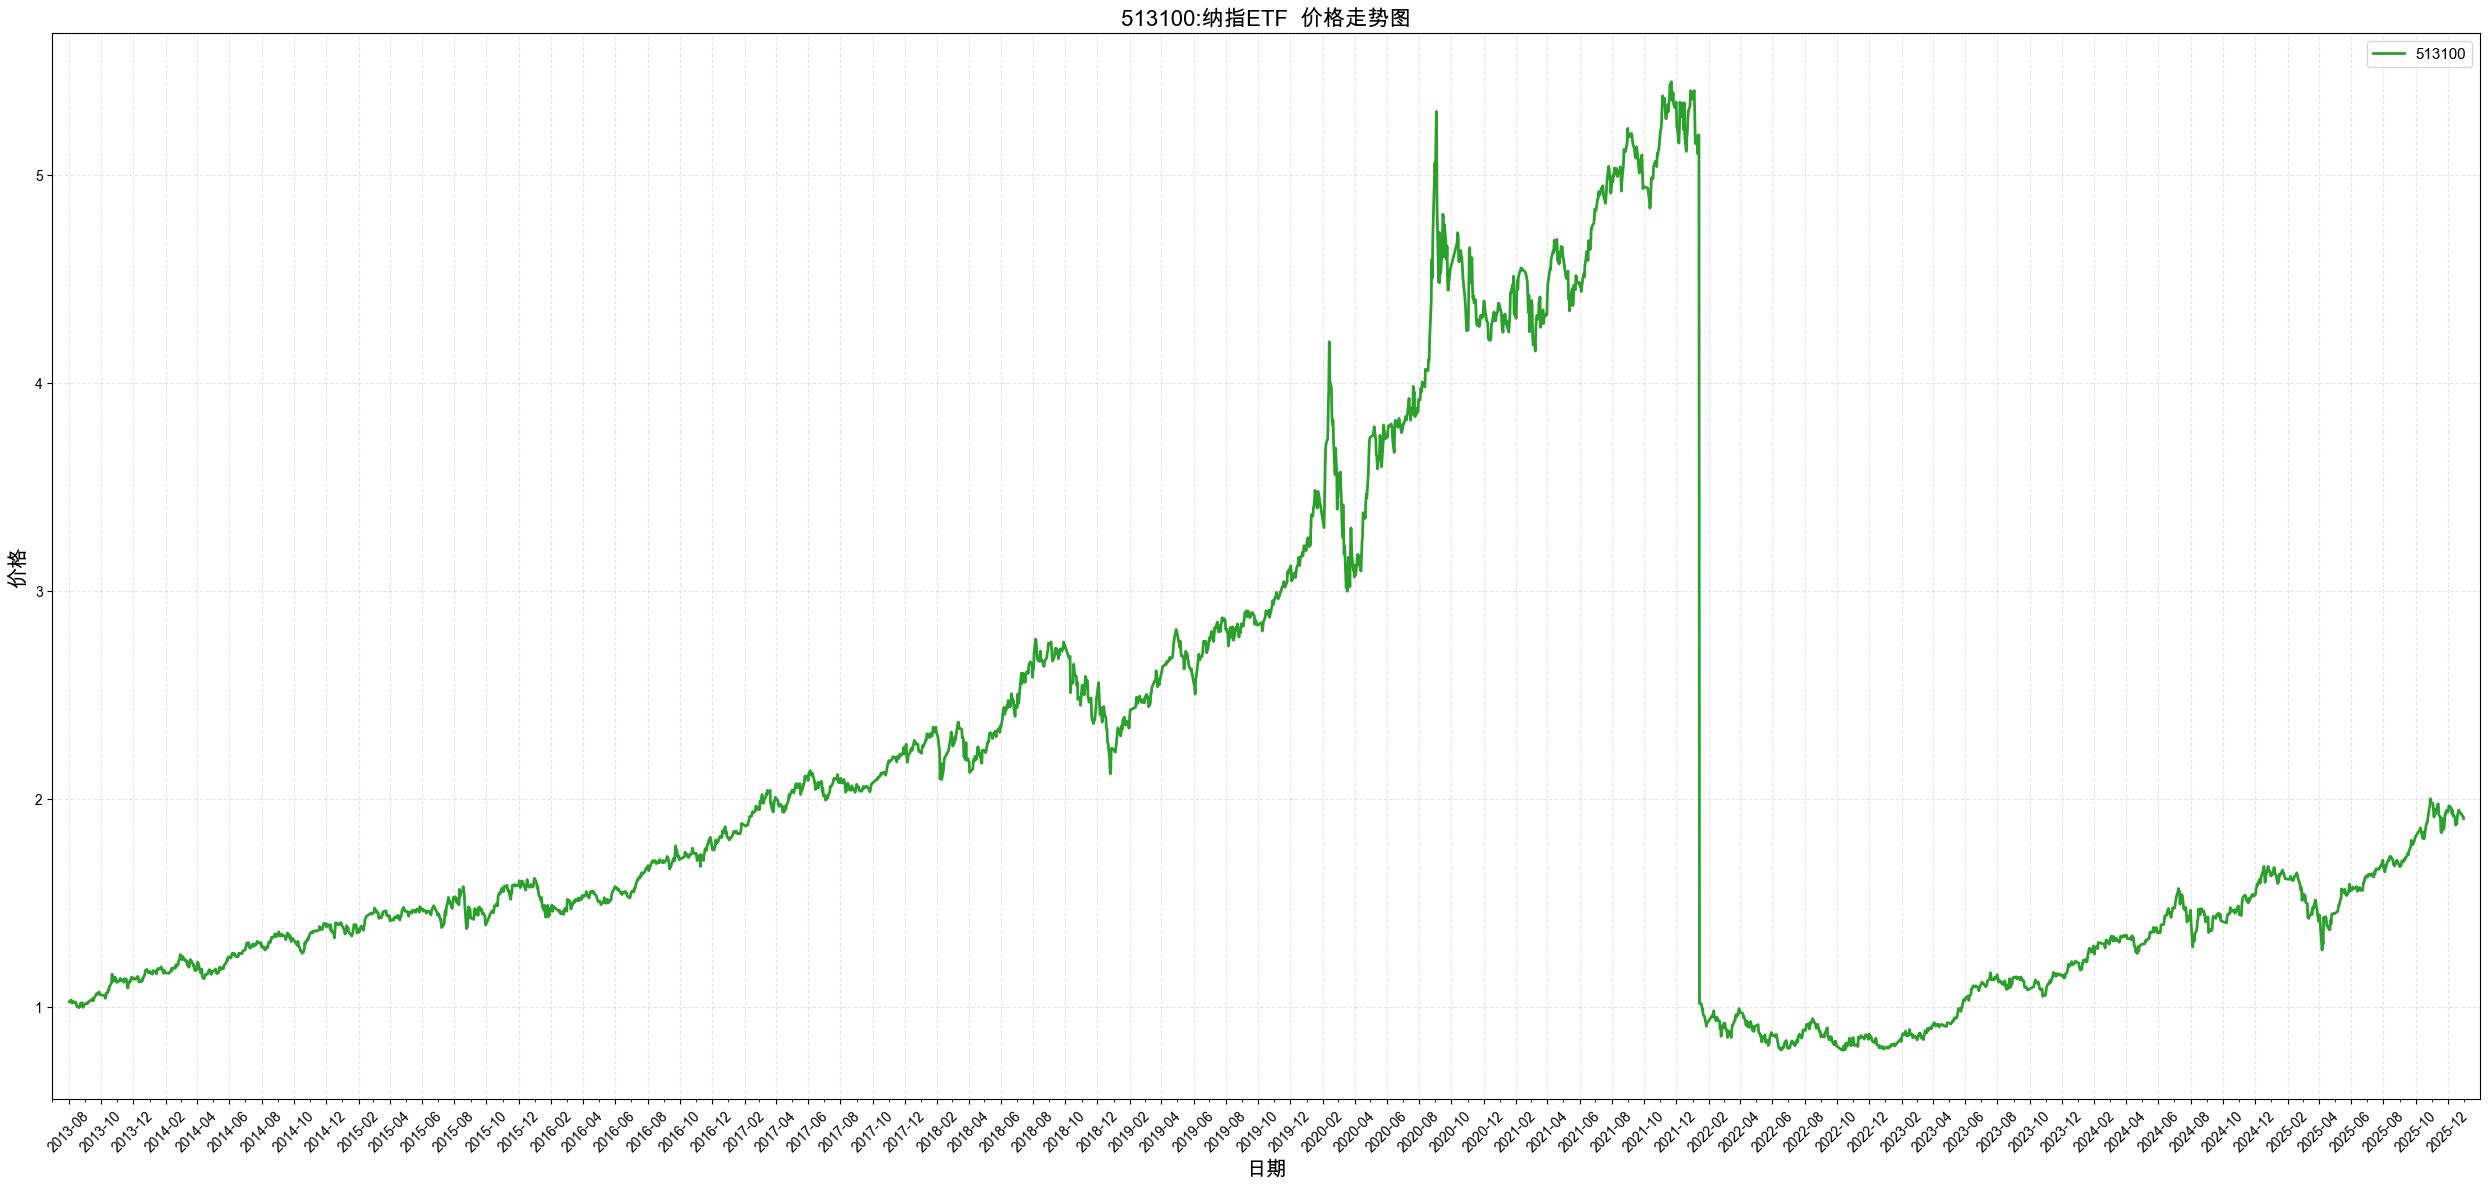

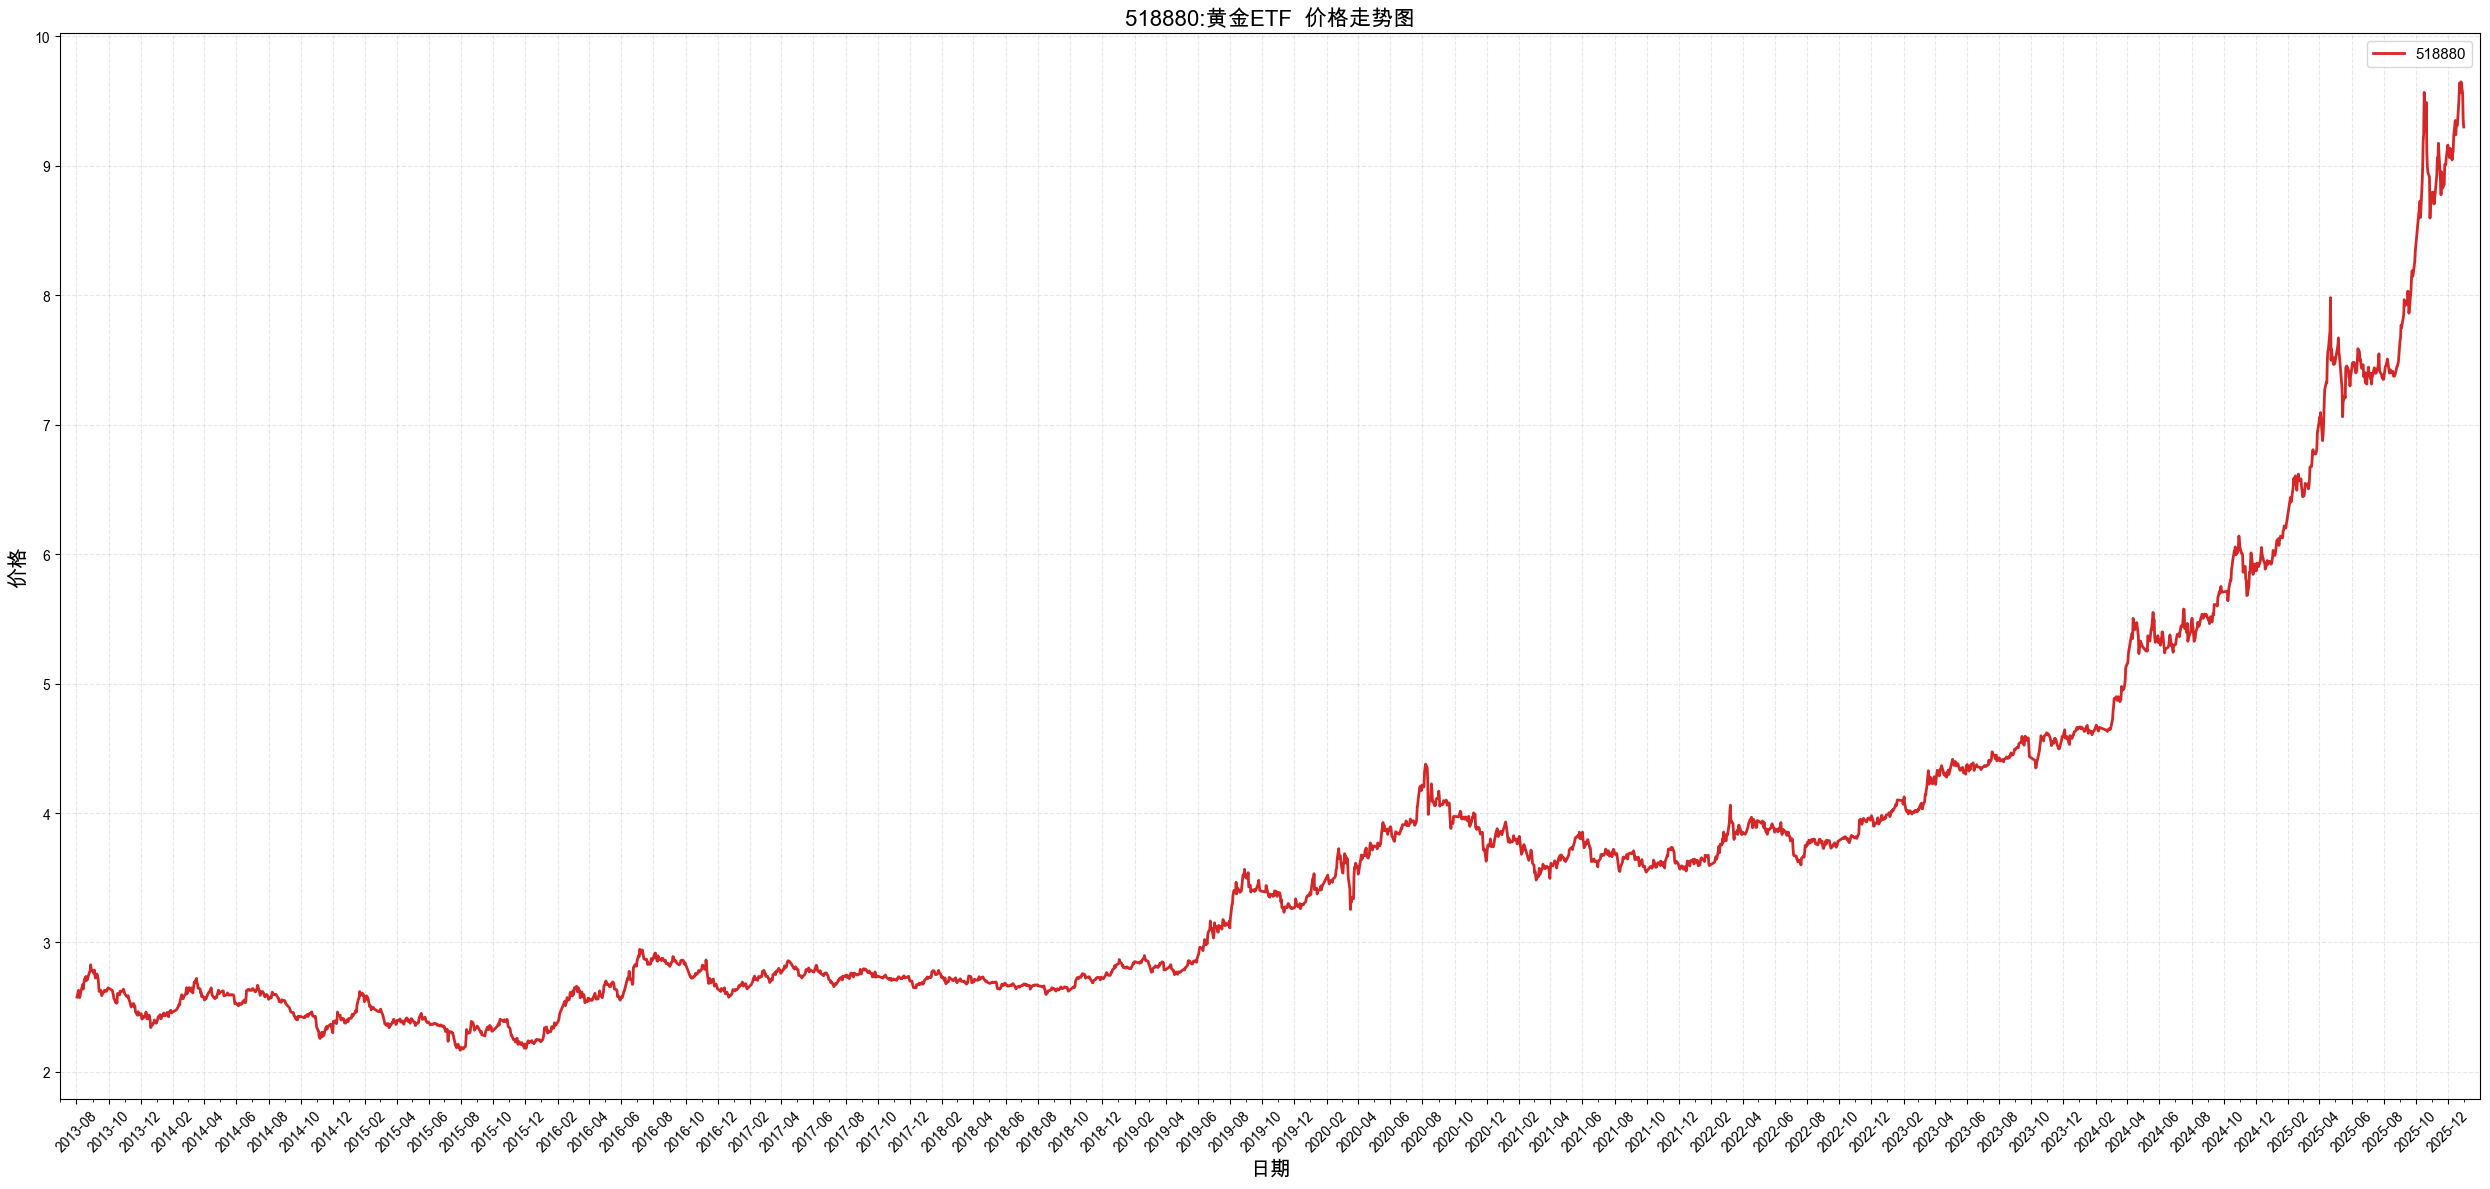

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置颜色方案
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
names_dict = {"513100": "纳指ETF", "510300": "沪深300ETF", "518880": "黄金ETF", "159915": "创业板ETF"}

for i in range(len(df.columns)):
    code = df.columns[i]

    plt.figure(figsize=(25, 12))
    plt.plot(df.index, df[code], color=colors[i], linewidth=2, label=code)
    plt.title(f'{code}:{names_dict.get(code, "未知ETF")}  价格走势图', fontsize=16, fontweight='bold')
    plt.xlabel('日期', fontsize=15)
    plt.ylabel('价格', fontsize=15)
    plt.grid(True, alpha=0.3, linestyle='--')

    # 设置日期格式
    plt.xlim([pd.Timestamp('2013-07-01'), pd.Timestamp('2026-01-31')])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45)

    plt.legend(loc='best', fontsize=11)
    plt.tight_layout()
    plt.show()